In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    
np.random.seed(123)

from scipy import linalg    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/DNA.csv')
df.head(10)

,num_of_atoms,num_of_heavy_atoms
0,14,6
1,11,5
2,15,6
3,21,7
4,20,7
5,8,6
6,14,5
7,18,7
8,25,8
9,18,7


In [ ]:
df.isnull().sum()

num_of_atoms          0
num_of_heavy_atoms    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610 entries, 0 to 14609
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_of_atoms        14610 non-null  int64
 1   num_of_heavy_atoms  14610 non-null  int64
dtypes: int64(2)
memory usage: 228.4 KB


Lihat persebaran data

Text(0, 0.5, 'num_of_atoms')

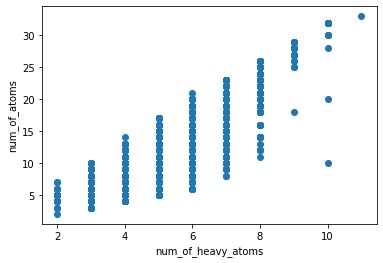

In [ ]:
plt.scatter(df['num_of_heavy_atoms'], df['num_of_atoms'])
plt.xlabel('num_of_heavy_atoms')
plt.ylabel('num_of_atoms')

Dapat dilihat persebaran data tidak terlalu menyebar melainkan berhimpit membentuk garis lurus. Hal ini bisa disebabkan oleh tidak terlalu bervariasinya besaran nilai.

Menentukan nilai K

In [ ]:
#class K_Means:
   """.

 def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        """
#

In [ ]:
'''model = K_Means()
model.fit(X)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()
'''

In [ ]:
def initialize_centroids(k, df):

    n_dims = df.shape[1]
    centroid_min = df.min().min()
    centroid_max = df.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, columns = df.columns)

    return centroids

centroids = initialize_centroids(3, df)
centroids

,num_of_atoms,num_of_heavy_atoms
0,23.590545,10.870319
1,9.032395,19.090758
2,24.303538,15.116300


In [ ]:
def calculate_error(a,b):
    '''
    Given two Numpy Arrays, calculates the root of the sum of squared errores.
    '''
    error = np.square(np.sum((a-b)**2))

    return error  

In [ ]:
errors = np.array([])
for centroid in range(centroids.shape[0]):
    error = calculate_error(centroids.iloc[centroid, :2], df.iloc[0,:2])
    errors = np.append(errors, error)

errors

array([13386.15668575, 38433.65759162, 35823.06745946])

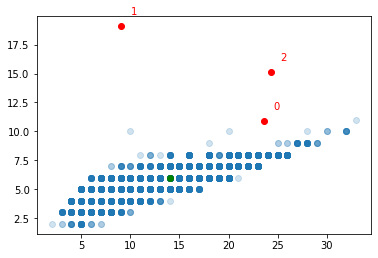

In [ ]:
plt.scatter(df.iloc[1:,0], df.iloc[1:,1],  marker = 'o', alpha = 0.2)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', c = 'r')
plt.scatter(df.iloc[0,0], df.iloc[0,1],  marker = 'o', c = 'g')
for i in range(centroids.shape[0]):
    plt.text(centroids.iloc[i,0]+1, centroids.iloc[i,1]+1, s = centroids.index[i], c = 'r')

Assign a centroid to each of the observations. Mencari posisi minimum dalam error list.

In [ ]:
np.where(errors == np.amin(errors))[0].tolist()[0]

0

In [ ]:
def assign_centroid(df, centroids):
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids. For assignment the index will be used.
    '''

    n_observations = df.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for observation in range(n_observations):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :2], df.iloc[observation,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

df['centroid'], df['error'] = assign_centroid(df.iloc[:,:2] ,centroids)
df[['centroid', 'error']].head()

,centroid,error
0,0,13386.156686
1,0,37242.232513
2,0,9509.656967
3,0,470.468865
4,0,776.814033


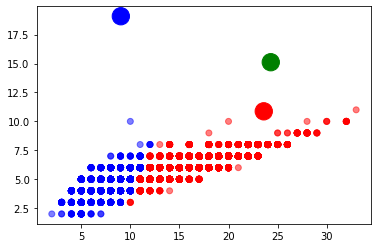

In [ ]:
colors = {0:'red', 1:'blue', 2:'green'}

plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', c = df['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

Sebenarnya disini persebaran data yang didapatkan tidak terlalu bagus. karena data cenderung tidak tersebar sesuai centroid terutama data biru.

Recalculate the position of the centroids

In [ ]:
data_columns = ['num_of_atoms','num_of_heavy_atoms']

centroids = df.groupby('centroid').agg('mean').loc[:,data_columns].reset_index(drop = True)
centroids

,num_of_atoms,num_of_heavy_atoms
0,16.393064,6.282966
1,8.214811,4.715093


Kita visualisasikan lagi data dan melihat bagaimana centroid berubah di tengah data

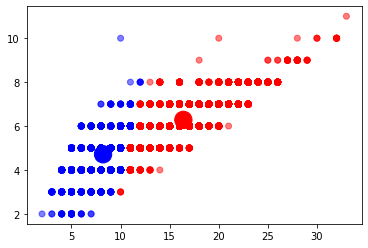

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', c = df['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))